## Transportation ATB 2022 Example Notebook

In this notebook, we demonstrate how to access the 2022 transportation ATB data from OEDI's S3 storage. We will see how to explore the data and generate some plots. This notebook was created with Python 3.11.11. You will need to install the `pandas`, `seaborn` and `matplotlib` packages.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Access

There are many ways to browse and load files from S3 storage with Python. Since the Transportation ATB data files are relatively small, we recommend simply using the [bucket viewer](https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=ATB%2Ftransportation%2F) to explore the files and then using the S3 URL to load the contents into a pandas dataframe. Each table is available in both csv and parquet format. The parquet files are much smaller, and therefore best for this application.

In [2]:
# Load the vehicles table
df = pd.read_parquet('https://oedi-data-lake.s3.amazonaws.com/ATB/transportation/parquet/2022/vehicles/vehicles.parquet')

# Split into light duty and medium/heavy duty
ldv = df[df['vehicle_weight_category_display']=='Light Duty']
mdhd = df[df['vehicle_weight_category_display']=='Medium/Heavy Duty']

### Structure

The vehicles table is unique on the 'year', 'scenario', 'vehicle_weight_category', 'vehicle_class', 'vehicle_powertrain', 'vehicle_detail' columns.

In [3]:
ldv_years = ldv['year'].unique()
ldv_scenarios = ldv['scenario'].unique()
ldv_classes = ldv['vehicle_class_display'].unique()
ldv_powertrains = ldv['vehicle_powertrain_display'].unique()
print('Light Duty Years:')
print(ldv_years, '\n')
print('Light Duty Scenarios:')
print(ldv_scenarios, '\n')
print('Light Duty Classes:')
print(ldv_classes, '\n')
print('Light Duty Powertrains:')
print(ldv_powertrains)

Light Duty Years:
[2020 2025 2030 2035 2050 2040 2045] 

Light Duty Scenarios:
['Mid' 'Advanced' 'Constant'] 

Light Duty Classes:
['Compact Passenger Car' 'Midsize Passenger Car' 'Midsize SUV'
 'Pickup Truck' 'Small SUV'] 

Light Duty Powertrains:
['Battery Electric' 'Diesel' 'Natural Gas' 'Gasoline' 'Plug-in Hybrid'
 'Hydrogen Fuel Cell' 'Gasoline Hybrid']


### Plotting

Let's focus on BEVs and generate plots of projected vehicle price and fuel economy.

In [4]:
ldv_bev = ldv[ldv['vehicle_powertrain_display']=='Battery Electric']
ldv_bev_powertrain_details = ldv_bev['vehicle_detail_display'].unique()
print('Light Duty BEV powertrain detail options:')
print(ldv_bev_powertrain_details)

Light Duty BEV powertrain detail options:
['Battery Electric Vehicle (200-mile range)'
 'Battery Electric Vehicle (300-mile range)'
 'Battery Electric Vehicle (400-mile range)'
 'Battery Electric Vehicle (500-mile range)']


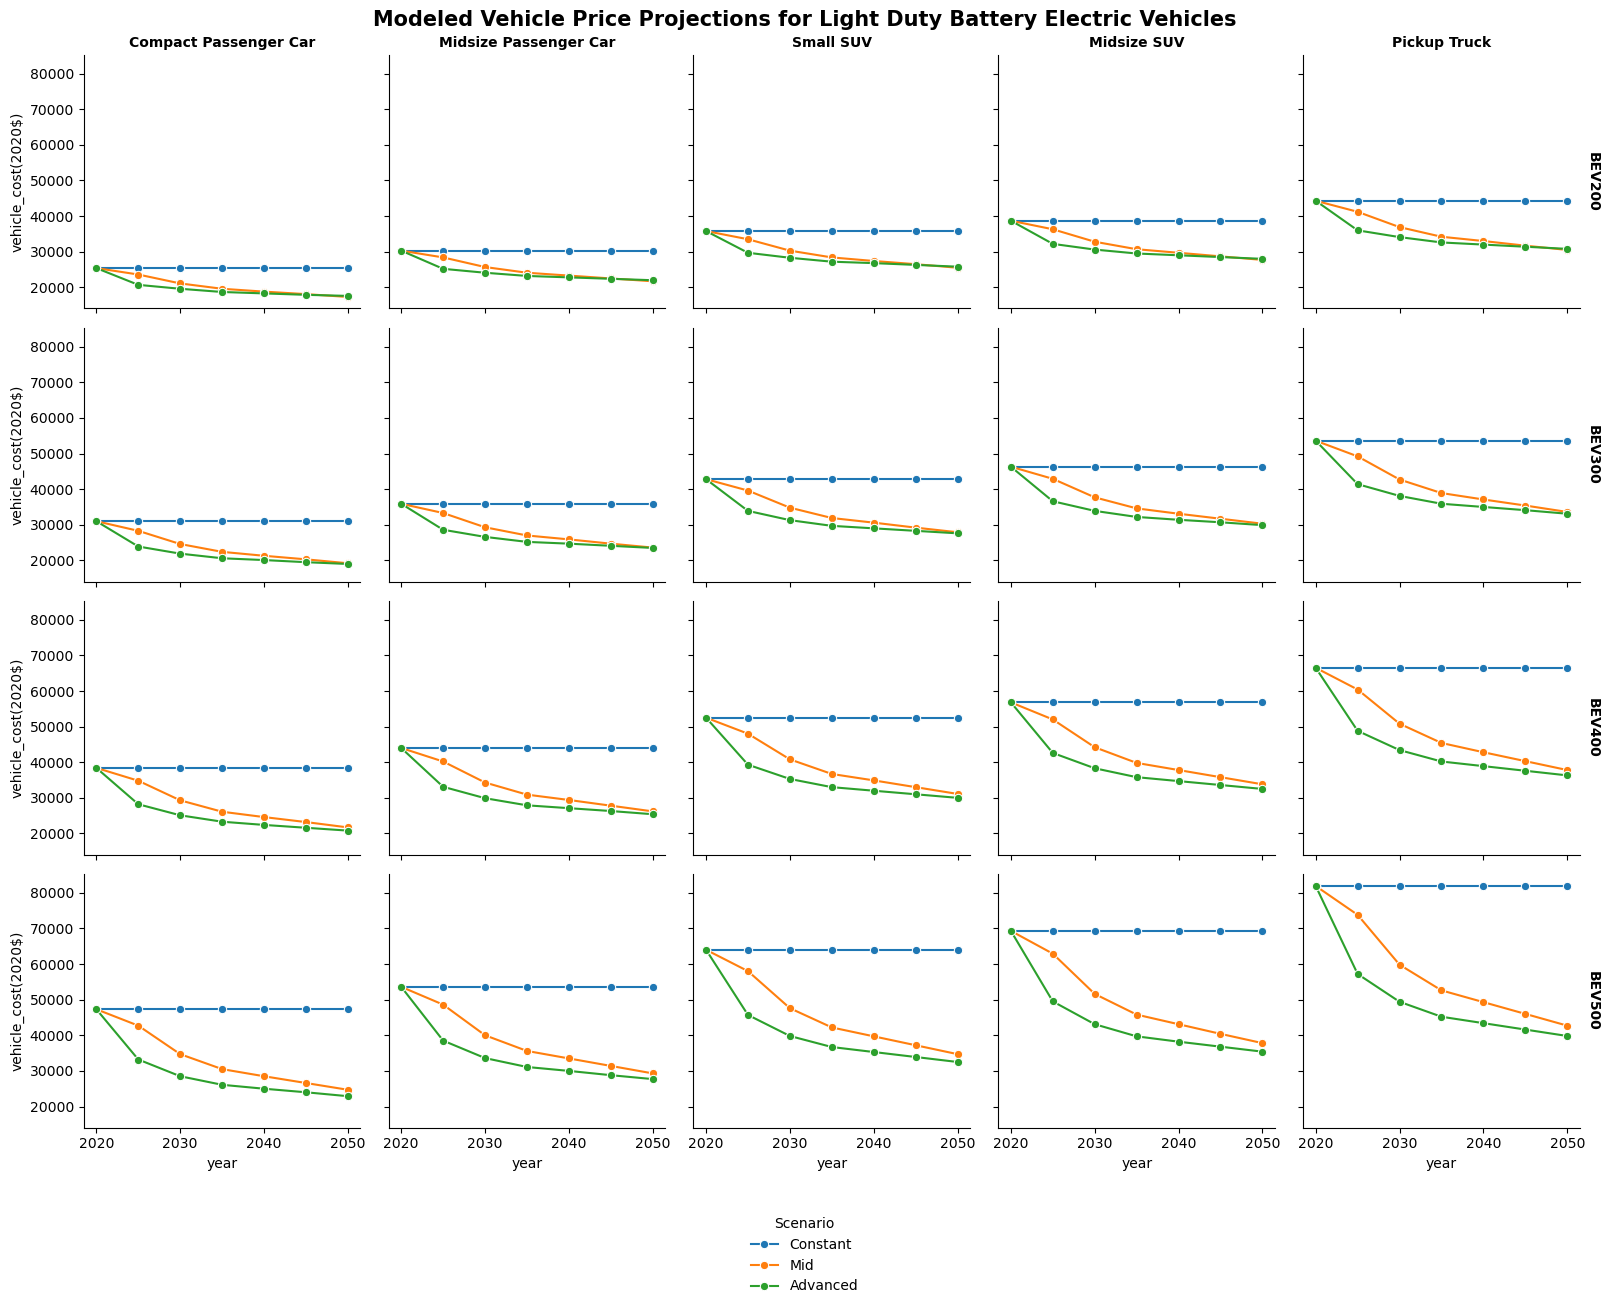

In [5]:
# Create a FacetGrid for vehicle detail by class
col_order = ['Compact Passenger Car', 'Midsize Passenger Car', 'Small SUV', 'Midsize SUV', 'Pickup Truck']
hue_order = ['Constant', 'Mid', 'Advanced']
g = sns.FacetGrid(ldv_bev, row='vehicle_detail', col='vehicle_class_display', col_order=col_order, hue='scenario', hue_order=hue_order, margin_titles=True)
g.set_titles(row_template='{row_name}', col_template="{col_name}", size=10, fontweight='bold')

# Plot the vehicle costs by scenario
g.map(sns.lineplot, "year", "vehicle_cost(2020$)", marker='o')
g.add_legend(title="Scenario", loc="lower center", bbox_to_anchor=(.5, -.1))
g.figure.suptitle('Modeled Vehicle Price Projections for Light Duty Battery Electric Vehicles', size=15, fontweight='bold')
plt.tight_layout()

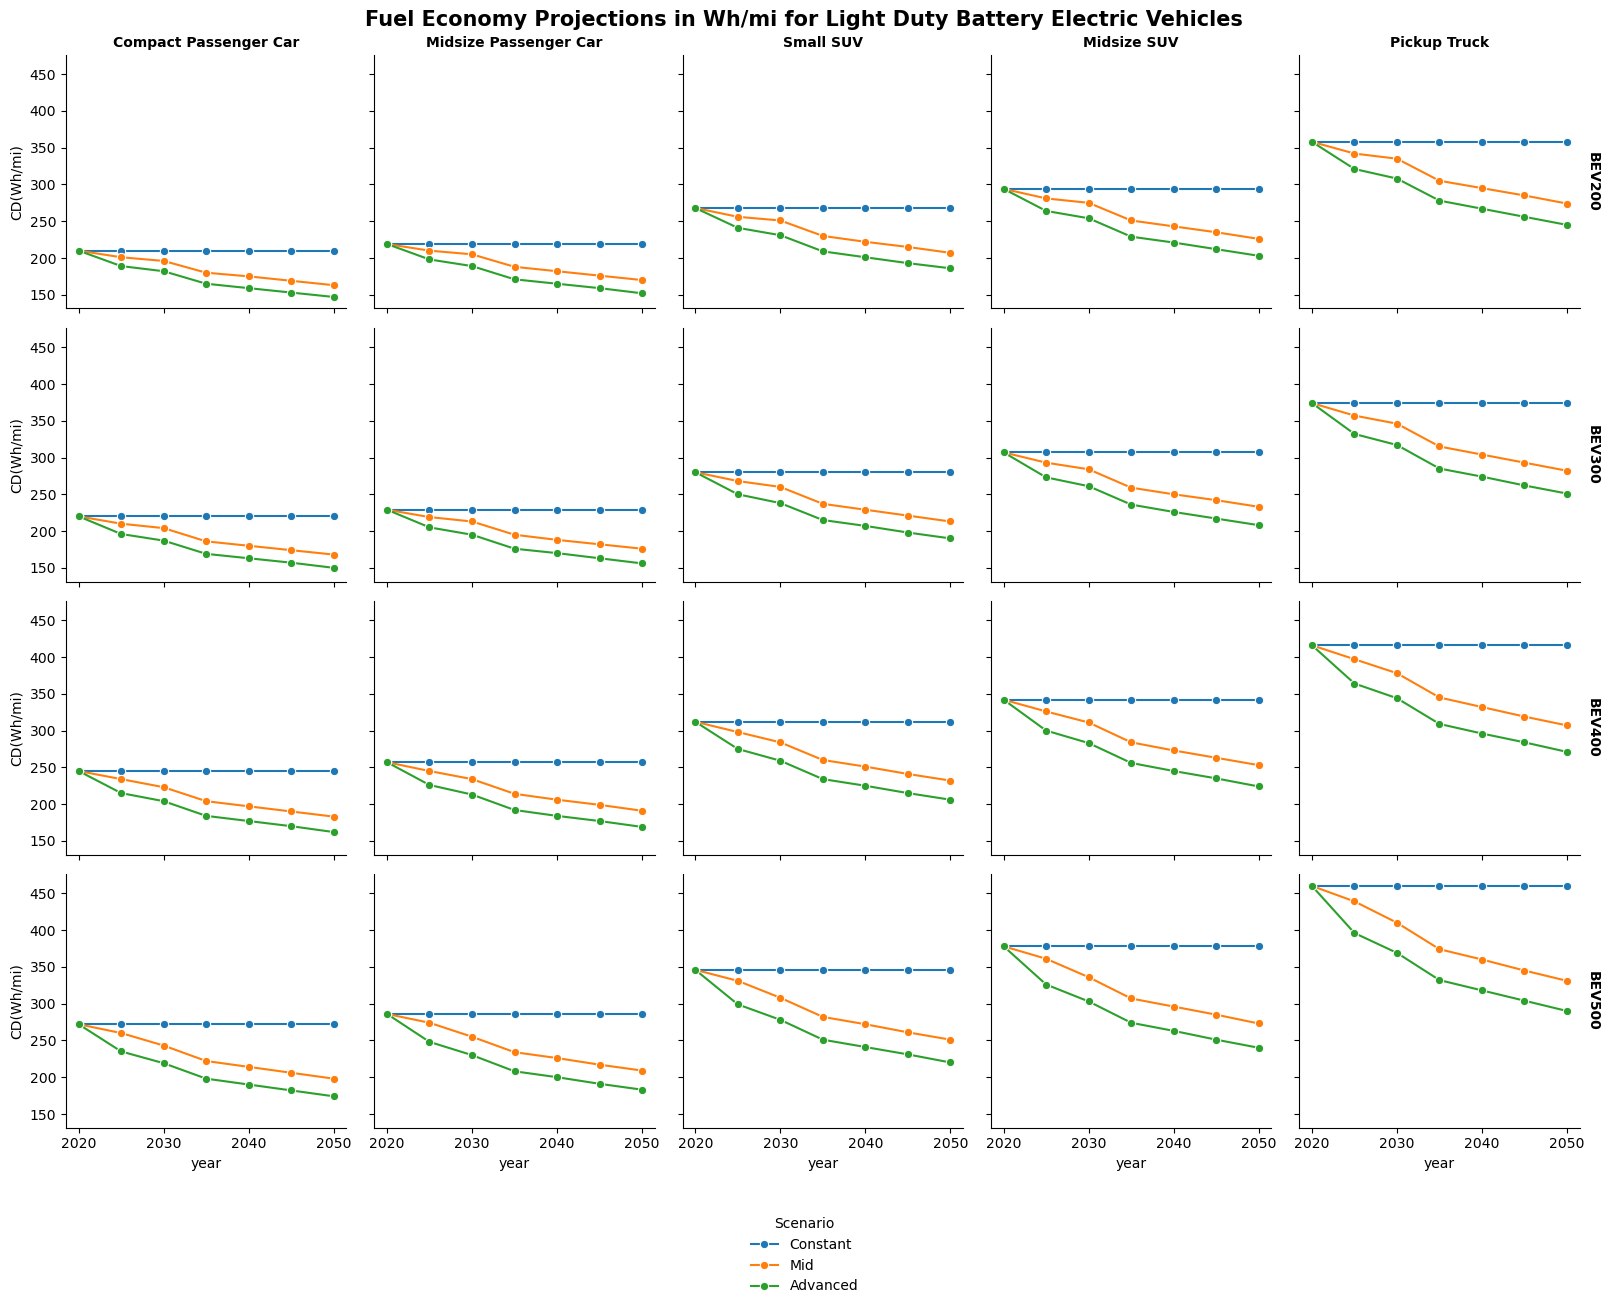

In [7]:
# Create a FacetGrid for vehicle detail by class
g = sns.FacetGrid(ldv_bev, row='vehicle_detail', col='vehicle_class_display', col_order=col_order, hue='scenario', hue_order=hue_order, margin_titles=True)
g.set_titles(row_template='{row_name}', col_template="{col_name}", size=10, fontweight='bold')

# Plot the fuel economy by scenario
g.map(sns.lineplot, "year", "CD(Wh/mi)", marker='o')
g.add_legend(title="Scenario", loc="lower center", bbox_to_anchor=(.5, -.1))
g.figure.suptitle('Fuel Economy Projections in Wh/mi for Light Duty Battery Electric Vehicles', size=15, fontweight='bold')
plt.tight_layout()